In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from citipy import citipy
from datetime import datetime

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("-----------")

# Create Counters
record_count = 1
set_count = 1


Beginning Data Retrieval
-----------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 36 of Set 12 | busselton
Processing Record 37 of Set 12 | santa isabel do rio negro
Processing Record 38 of Set 12 | ryki
Processing Record 39 of Set 12 | tupiza
Processing Record 40 of Set 12 | savannah bight
Processing Record 41 of Set 12 | sambava
Processing Record 42 of Set 12 | hermanus
Processing Record 43 of Set 12 | puerto plata
Processing Record 44 of Set 12 | kuche
City not found. Skipping...
Processing Record 45 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 12 | hunza
City not found. Skipping...
Processing Record 47 of Set 12 | rieti
Processing Record 48 of Set 12 | tasiilaq
Processing Record 49 of Set 12 | clyde river
Processing Record 50 of Set 12 | qaanaaq
Processing Record 51 of Set 12 | asifabad
Processing Record 52 of Set 12 | saint-raymond
Processing Record 53 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 54 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 55 of Set 12 | 

Processing Record 31 of Set 15 | mitu
Processing Record 32 of Set 15 | mana
Processing Record 33 of Set 15 | kampene
Processing Record 34 of Set 15 | namibe
Processing Record 35 of Set 15 | klaksvik
Processing Record 36 of Set 15 | haileybury
Processing Record 37 of Set 15 | kumta
Processing Record 38 of Set 15 | almansa
Processing Record 39 of Set 15 | kayerkan
Processing Record 40 of Set 15 | huarmey
Processing Record 41 of Set 15 | chamonix-mont-blanc
Processing Record 42 of Set 15 | sao felix do xingu
Processing Record 43 of Set 15 | pinahat
Processing Record 44 of Set 15 | novodzherelievskaya
City not found. Skipping...
Processing Record 45 of Set 15 | pandharpur
Processing Record 46 of Set 15 | barao de melgaco
Processing Record 47 of Set 15 | punta cardon
Processing Record 48 of Set 15 | sorvag
City not found. Skipping...
Processing Record 49 of Set 15 | wilmington
Processing Record 50 of Set 15 | suratgarh
Processing Record 1 of Set 16 | vila franca do campo
Processing Record 2

Processing Record 17 of Set 19 | saquena
Processing Record 18 of Set 19 | hamilton
Processing Record 19 of Set 19 | chimbote
Processing Record 20 of Set 19 | warri
Processing Record 21 of Set 19 | hyvinkaa
Processing Record 22 of Set 19 | rutland
Processing Record 23 of Set 19 | suhl
Processing Record 24 of Set 19 | soure
Processing Record 25 of Set 19 | fatezh
Processing Record 26 of Set 19 | havoysund
Processing Record 27 of Set 19 | grand-santi
Processing Record 28 of Set 19 | hukuntsi
Processing Record 29 of Set 19 | slatina
Processing Record 30 of Set 19 | svetlogorsk
Processing Record 31 of Set 19 | vallentuna
Processing Record 32 of Set 19 | albanel
Processing Record 33 of Set 19 | tori fatehpur
Processing Record 34 of Set 19 | manturovo
Processing Record 35 of Set 19 | manyana
Processing Record 36 of Set 19 | kathmandu
Processing Record 37 of Set 19 | beysehir
Processing Record 38 of Set 19 | faya
Processing Record 39 of Set 19 | jiroft
City not found. Skipping...
Processing Re

Processing Record 5 of Set 23 | les cayes
Processing Record 6 of Set 23 | turukhansk
Processing Record 7 of Set 23 | tsentralnyy
City not found. Skipping...
Processing Record 8 of Set 23 | sabha
Processing Record 9 of Set 23 | mwinilunga
Processing Record 10 of Set 23 | mezen
Processing Record 11 of Set 23 | sembe
Processing Record 12 of Set 23 | novooleksiyivka
Processing Record 13 of Set 23 | umm lajj
Processing Record 14 of Set 23 | san carlos de bariloche
Processing Record 15 of Set 23 | gorey
Processing Record 16 of Set 23 | jundubah
City not found. Skipping...
Processing Record 17 of Set 23 | karaul
City not found. Skipping...
Processing Record 18 of Set 23 | boa vista
Processing Record 19 of Set 23 | akhmim
Processing Record 20 of Set 23 | londonderry
Processing Record 21 of Set 23 | bissau
Processing Record 22 of Set 23 | gornopravdinsk
Processing Record 23 of Set 23 | nantucket
Processing Record 24 of Set 23 | bushehr
Processing Record 25 of Set 23 | suluq
Processing Record 26

In [16]:
   len(city_data)

543

In [17]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gamba,-2.6500,10.0000,73.22,85,48,7.07,GA,2021-07-28 17:54:06
1,Gamba,-2.6500,10.0000,73.22,85,48,7.07,GA,2021-07-28 17:54:06
2,Busselton,-33.6500,115.3333,58.08,78,46,24.25,AU,2021-07-28 17:56:46
3,Santa Isabel Do Rio Negro,-0.4139,-65.0192,91.94,48,97,0.83,BR,2021-07-28 17:56:46
4,Ryki,51.6257,21.9327,81.63,71,77,6.24,PL,2021-07-28 17:56:46
5,Tupiza,-21.4500,-65.7167,60.84,13,8,26.15,BO,2021-07-28 17:56:47
6,Savannah Bight,16.4500,-85.8500,91.45,75,86,20.74,HN,2021-07-28 17:56:47
7,Sambava,-14.2667,50.1667,67.91,79,0,11.23,MG,2021-07-28 17:56:47
8,Hermanus,-34.4187,19.2345,54.81,72,23,18.32,ZA,2021-07-28 17:56:48
9,Puerto Plata,19.7934,-70.6884,91.45,83,75,0.00,DO,2021-07-28 17:56:02


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gamba,GA,2021-07-28 17:54:06,-2.6500,10.0000,73.22,85,48,7.07
1,Gamba,GA,2021-07-28 17:54:06,-2.6500,10.0000,73.22,85,48,7.07
2,Busselton,AU,2021-07-28 17:56:46,-33.6500,115.3333,58.08,78,46,24.25
3,Santa Isabel Do Rio Negro,BR,2021-07-28 17:56:46,-0.4139,-65.0192,91.94,48,97,0.83
4,Ryki,PL,2021-07-28 17:56:46,51.6257,21.9327,81.63,71,77,6.24
5,Tupiza,BO,2021-07-28 17:56:47,-21.4500,-65.7167,60.84,13,8,26.15
6,Savannah Bight,HN,2021-07-28 17:56:47,16.4500,-85.8500,91.45,75,86,20.74
7,Sambava,MG,2021-07-28 17:56:47,-14.2667,50.1667,67.91,79,0,11.23
8,Hermanus,ZA,2021-07-28 17:56:48,-34.4187,19.2345,54.81,72,23,18.32
9,Puerto Plata,DO,2021-07-28 17:56:02,19.7934,-70.6884,91.45,83,75,0.00


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

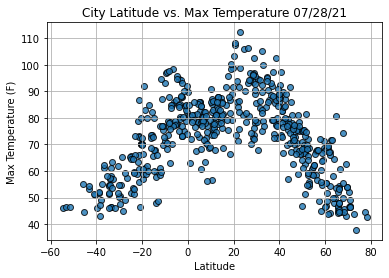

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

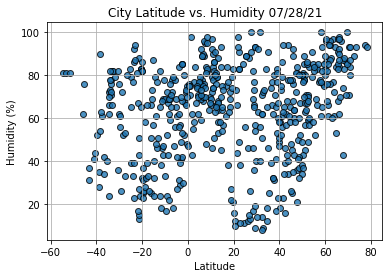

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

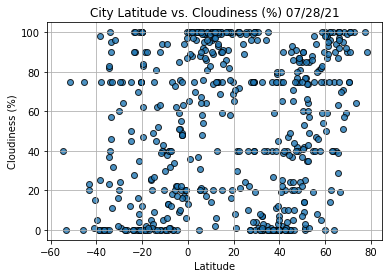

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

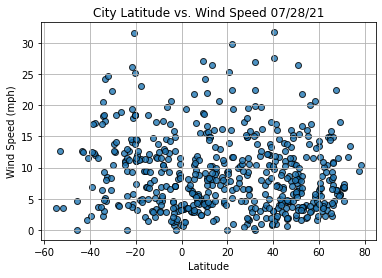

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()